In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from matplotlib import pyplot as plt
%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
train = pd.read_csv('train.csv', sep='\t')
test = pd.read_csv('test.csv', sep='\t')

In [3]:
train.head()

Unnamed: 0  0  1  2  3  4  5  6         7  8 ...        336  337  338  339  \
0           0  1  1  0  0  0  0  0  0.090909  0 ...   0.221395    0    1    0   
1           1  1  1  0  0  1  0  0  0.090909  0 ...   0.241508    0    1    0   
2           2  0  1  0  0  1  0  0  0.090909  0 ...   0.123067    0    1    0   
3           3  0  1  0  0  1  0  0  0.136364  0 ...   0.296065    0    0    1   
4           4  0  1  0  0  1  0  0  0.136364  0 ...   0.178956    0    0    1   

   340       341  342  343  344  345  
0    0  0.222222    1    1    1    1  
1    0  0.111111    1    1    1    0  
2    0  0.444444    1    1    1    1  
3    0  0.222222    1    1    1    0  
4    0  0.111111    1    1    1    1  

[5 rows x 347 columns]

In [ ]:
pp.ProfileReport(train)

In [ ]:
pp.ProfileReport(test)

# Data clean-up

In [3]:
def drop_useless(df, threshold=None, indexes=None):
    count_dict = {}
    
    try:
        df = df.drop('Unnamed: 0', axis=1)
    except:
        pass
    
    if not indexes:
        for index in np.where(df.dtypes == np.int)[0][1:]:
            pos = np.sum(df['%d' % (index - 1)])
            neg = df.shape[0] - pos
            count_dict[index] = min(pos, neg)
    
        count_dict = list(sorted(count_dict.items(), key=lambda x: x[1]))
        indexes = set(t[0] for t in count_dict if t[1] < threshold)
        
    return df.drop(['%d' % x for x in indexes], axis=1, errors='ignore'), indexes


def drop_corr_1(df):
    return df.drop(['9'], axis=1, errors='ignore')


def drop_corr_095(df):
    train_correlated_095 = [146, 148, 153, 165, 180, 323, 326, 334]
    return df.drop(['%d' % x for x in train_correlated_095], axis=1, errors='ignore')


def drop_corr_090(df):
    train_correlated_090 = [117, 119, 122, 158, 179, 206, 
                            324, 325, 327, 333, 335, 341]
    return df.drop(['%d' % x for x in train_correlated_090], axis=1, errors='ignore')


def make_boolean_zero_no_zero(df):
    train_make_boolean_zeron_no_zero = [120, 331, 66, 67, 68, 69, 7, 70, 71, 72, 73, 
                              74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
                              86, 87, 88, 89, 90, 91, 93]
    
    df = df.copy()
    for x in train_make_boolean_zeron_no_zero:
        df['%d' % x] = np.array(df['%d' % x].map(lambda x: 1 if x > 0 else 0), dtype=np.int)
        
    return df

def make_boolean_one_no_one(df):
    train_make_boolean_one_no_one = [211, 212, 99]
    
    df = df.copy()
    for x in train_make_boolean_one_no_one:
        df['%d' % x] = np.array(df['%d' % x].map(lambda x: 1 if x >= 1 else 0), dtype=np.int)
        
    return df


def make_bolean_more_that_09(df):
    train_make_bolean_more_that_09 = [315, 319]
    df = df.copy()
    for x in train_make_bolean_more_that_09:
        df['%d' % x] = np.array(df['%d' % x].map(lambda x: 1 if x >= 0.9 else 0), dtype=np.int)
        
    return df

def replace_zeros_less_010_with_means(df):
    train_replace_with_mean_010 = [108, 330]
    
    df = df.copy()
    for idx in train_replace_with_mean_010:
        series = df['%d' % idx] 
        mean = np.mean(series[series != 0.])
        series[series == 0.] = mean
        df['%d' % idx] = series
        
    return df

def replace_zeros_less_020_with_means(df):
    train_replace_with_mean_020 = [109, 110, 111, 112, 113, 115, 116]
    
    df = df.copy()
    for idx in train_replace_with_mean_020:
        series = df['%d' % idx] 
        mean = np.mean(series[series != 0.])
        series[series == 0.] = mean
        df['%d' % idx] = series
        
    return df

def replace_zeros_less_040_with_means(df):
    train_replace_with_mean_040 = [13]
    
    df = df.copy()
    for idx in train_replace_with_mean_040:
        series = df['%d' % idx] 
        mean = np.mean(series[series != 0.])
        series[series == 0.] = mean
        df['%d' % idx] = series
        
    return df

def clip(series, threshold):
    return np.clip(series, 0., threshold)


def clip_by_01(df):
    train_clip_by_01 = [321]
    
    df = df.copy()
    for idx in train_clip_by_01:
        series = df['%d' % idx] 
        df['%d' % idx] = clip(series, 0.1)

    return df


def clip_by_04(df):
    train_clip_by_04 = [317]
    
    df = df.copy()
    for idx in train_clip_by_04:
        series = df['%d' % idx] 
        df['%d' % idx] = clip(series, 0.4)

    return df


def clip_by_05(df):
    train_clip_by_05 = [123]
    
    df = df.copy()
    for idx in train_clip_by_05:
        series = df['%d' % idx] 
        df['%d' % idx] = clip(series, 0.5)

    return df


def clip_by_06(df):
    train_clip_by_06 = [313, 314, 320]
    
    df = df.copy()
    for idx in train_clip_by_06:
        series = df['%d' % idx] 
        df['%d' % idx] = clip(series, 0.6)

    return df

def drop_const(df):
    train_const = [140, 152, 160, 164]
    return drop_useless(df, indexes=train_const)[0]


def to_categorical(df):
    df = df.copy()
    df['124'] = np.array(df['124'] * 4, dtype=np.int)
    return df


def feature_338_339(df):
    df['xor_338_339'] = df['338'] ^ df['339']
    return df


def feature_338_329(df):
    df['mul_338_329'] = df['338'] * df['329']
    return df


possible_transforms = {
    'drop_const': drop_const,
    'drop_corr_1': drop_corr_1,
    'drop_corr_095': drop_corr_095,
    'drop_corr_090': drop_corr_090,
    'make_boolean_one_no_one': make_boolean_one_no_one,
    'make_bolean_more_that_09': make_bolean_more_that_09,
    'make_boolean_zero_no_zero': make_boolean_zero_no_zero,
    'replace_zeros_less_010_with_means': replace_zeros_less_010_with_means,
    'replace_zeros_less_020_with_means': replace_zeros_less_020_with_means,
    'replace_zeros_less_040_with_means': replace_zeros_less_040_with_means,
    'clip_by_01': clip_by_01,
    'clip_by_04': clip_by_04,
    'clip_by_05': clip_by_05,
    'clip_by_06': clip_by_06,
    'to_categorical': to_categorical,
    'feature_338_339': feature_338_339,
    'feature_338_329': feature_338_329,
}

def get_clean_df(train, test, drop_thr, transforms):
    train, indexes = drop_useless(train, threshold=drop_thr)
    test, _ = drop_useless(test, indexes=indexes)
    
    for name in transforms:
        train = possible_transforms[name](train)
        test = possible_transforms[name](test)
        
    return train, test

# Preprocess

In [4]:
def min_max_norm(X):
    mins = np.min(X, axis=0)
    maxs = np.max(X, axis=0)
        
    return (X - mins) / (maxs - mins)

In [5]:
def get_trainable_data(train, test, drop_thr=21, transforms=()):
    train, test = get_clean_df(train, test, drop_thr, transforms)
    
    train['is_train'] = 1
    test['is_train'] = 0
    df = pd.concat([train, test])
    df = min_max_norm(df)
    
    train = df[df['is_train'] == 1].drop('is_train', axis=1)
    test = df[df['is_train'] == 0].drop('is_train', axis=1)
    
    X, y = train.drop('0', axis=1), train['0']
    competition_data = test.drop('0', axis=1)
    
    categorical_indixes = np.where(X.dtypes == np.int)[0]
    names = X.columns
    
    return np.array(X), np.array(y), np.array(competition_data), (categorical_indixes, names)

# Validation

In [6]:
from sklearn.model_selection import StratifiedKFold

_DEFULT_CV_ALGO = StratifiedKFold(n_splits=5,
                                  shuffle=True,
                                  random_state=0xCAFFE)
def get_cv_data(X, y, cv_algo=_DEFULT_CV_ALGO):
    cv_data = []
    for train_ids, val_ids in cv_algo.split(X, y):
        X_train, X_val = X[train_ids], X[val_ids]
        y_train, y_val = y[train_ids], y[val_ids]
        
        cv_data.append((X_train, y_train, X_val, y_val, val_ids))
        
    return cv_data

# Trainers

In [7]:
from sklearn.metrics import roc_auc_score
def trainer(estimator, 
            x_train, y_train, 
            x_val, y_val,
            x_competition,
            metric=roc_auc_score):
    estimator.fit(x_train, y_train)
    
    y_train_pred = estimator.predict_proba(x_train)[:, 1]
    train_score = roc_auc_score(y_train, y_train_pred)
    
    y_val_pred = estimator.predict_proba(x_val)[:, 1]
    val_score = roc_auc_score(y_val, y_val_pred)
    
    y_competition = estimator.predict_proba(x_competition)[:, 1]
    
    return train_score, val_score, y_val_pred, y_competition

In [8]:
from tqdm import tqdm
def train_one_thread(estimator, 
                     data_generator,
                     competition_data,
                     train_ids,
                     test_ids):
    
    oof = pd.DataFrame({'_ID_': train_ids,
                        '_VAL_': np.zeros_like(train_ids)})
    sub = pd.DataFrame({'_ID_': test_ids,
                        '_VAL_': np.zeros_like(test_ids)})
    val_scores = []
    train_scores = []
    
    for (X_train, y_train, X_val, y_val, val_ids) in tqdm(data_generator, desc='Train one thread'):
        train_score, val_score, y_val_pred, y_competition = trainer(estimator, 
                                                                    X_train, y_train, 
                                                                    X_val, y_val, 
                                                                    competition_data)
        
        oof['_VAL_'].loc[val_ids] = y_val_pred
        sub['_VAL_'] += y_competition / len(data_generator)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        print('\tTrain Score ', train_score, '\n\tVal Score: ', val_score, '\n')
    print('Train Total: ', np.mean(train_scores), '\n', 'Val Total: ', np.mean(val_scores))
    
    return oof, sub

# LogRegression

In [131]:
from sklearn.linear_model import LogisticRegression

In [155]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'replace_zeros_less_020_with_means',
    'replace_zeros_less_040_with_means',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'feature_338_339',
    'feature_338_329',
]
X, y, competition_data, _ = get_trainable_data(train, test, 
                                               drop_thr=23, 
                                               transforms=transforms)

data_generator = get_cv_data(X, y)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
estimator = LogisticRegression(C=0.05, class_weight='balanced', solver='liblinear', max_iter=1000)

In [161]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:03<00:14,  3.53s/it]

	Train Score  0.7375399453060512 
	Val Score:  0.7161391381680007 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:07<00:10,  3.53s/it]

	Train Score  0.7372208746724979 
	Val Score:  0.7154591023012076 



Train one thread:  60%|██████    | 3/5 [00:10<00:07,  3.65s/it]

	Train Score  0.7355378249050811 
	Val Score:  0.7234072896517819 



Train one thread:  80%|████████  | 4/5 [00:14<00:03,  3.70s/it]

	Train Score  0.7369442812094674 
	Val Score:  0.717103486588206 



Train one thread: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]

	Train Score  0.7373801735477361 
	Val Score:  0.7151140673919202 

Train Total:  0.7369246199281667 
 Val Total:  0.7174446168202233


In [153]:
sub.head()

_ID_     _VAL_
0     0  0.334338
1     1  0.796134
2     2  0.384178
3     3  0.705639
4     4  0.793817

In [154]:
oof.to_csv('train_logreg_07235.csv', index=False)
sub.to_csv('sub_logreg_07235.csv', index=False)

# Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(
    class_weight=None, 
    criterion='entropy',
    max_depth=15, 
    max_features=0.7,
    min_samples_leaf=13, 
    min_samples_split=6,
    n_estimators=1000,
    random_state=0xCAFFE,
    n_jobs=-1)

In [169]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
    'feature_338_339',
    'feature_338_329',
]
X, y, competition_data, _ = get_trainable_data(train, test, 
                                               drop_thr=241, 
                                               transforms=transforms)

data_generator = get_cv_data(X, y)

In [198]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [01:13<04:52, 73.05s/it]

	Train Score  0.9347219427036153 
	Val Score:  0.7361618856525478 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [02:25<03:38, 72.93s/it]

	Train Score  0.9358999427035694 
	Val Score:  0.7327165053395953 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [03:39<02:26, 73.09s/it]

	Train Score  0.9359401829432494 
	Val Score:  0.7356013066790412 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [04:53<01:13, 73.25s/it]

	Train Score  0.9353867955179 
	Val Score:  0.7250017475249528 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [06:05<00:00, 73.18s/it]

	Train Score  0.9368723837872587 
	Val Score:  0.7298828606431628 

Train Total:  0.9357642495311186 
 Val Total:  0.73187286116786


In [192]:
np.max(estimator.feature_importances_)

0.06461375204000007

In [185]:
oof_07306 = oof
sub_07306 = sub

In [194]:
oof = oof_07306
sub = sub_07306

In [195]:
sub.head()

_ID_     _VAL_
0     0  0.215993
1     1  0.434025
2     2  0.152263
3     3  0.360184
4     4  0.598786

In [199]:
oof.to_csv('train_randomforest_07318.csv', index=False)
sub.to_csv('sub_randomforest_07318.csv', index=False)

# ExtraTrees

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
estimator = ExtraTreesClassifier(n_estimators=1000,
                                 max_depth=23,
                                 min_samples_leaf=4,
                                 min_samples_split=2,
                                 criterion='entropy',
                                 random_state=0xCAFFE,
                                 n_jobs=-1)

In [11]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
    'feature_338_339',
    'feature_338_329',
]
X, y, competition_data, _ = get_trainable_data(train, test, 
                                               drop_thr=241, 
                                               transforms=transforms)

data_generator = get_cv_data(X, y)

In [12]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:06<00:27,  6.87s/it]

	Train Score  0.9758186011227306 
	Val Score:  0.735726780293843 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:13<00:20,  6.83s/it]

	Train Score  0.9757646278895473 
	Val Score:  0.7358574221477447 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [00:20<00:13,  6.81s/it]

	Train Score  0.9754098509466207 
	Val Score:  0.7456647568814295 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [00:27<00:06,  6.80s/it]

	Train Score  0.975619816871455 
	Val Score:  0.7302967481319877 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [00:34<00:00,  6.81s/it]

	Train Score  0.9754196308107692 
	Val Score:  0.7354683182923554 

Train Total:  0.9756065055282246 
 Val Total:  0.736602805149472


In [13]:
sub_07366 = sub
oof_07366 = oof

In [ ]:
sub = sub_07366
oof = oof_07366

In [14]:
sub.head()

_ID_     _VAL_
0     0  0.176849
1     1  0.361255
2     2  0.162469
3     3  0.204586
4     4  0.632118

In [15]:
oof.to_csv('train_extratrees_07366.csv', index=False)
sub.to_csv('sub_extratrees_07366.csv', index=False)

# kNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
estimator = KNeighborsClassifier(n_neighbors=5,
                                 algorithm='brute')

In [225]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
    'feature_338_339',
    'feature_338_329',
]
X, y, competition_data, _ = get_trainable_data(train, test, 
                                               drop_thr=241, 
                                               transforms=transforms)

data_generator = get_cv_data(X, y)

In [231]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:16<01:05, 16.41s/it]

	Train Score  0.8678225798129904 
	Val Score:  0.6454740222991496 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:32<00:48, 16.22s/it]

	Train Score  0.8670258857097195 
	Val Score:  0.6377613755797117 



Train one thread:  60%|██████    | 3/5 [00:47<00:31, 15.80s/it]

	Train Score  0.864180026473028 
	Val Score:  0.6728823667247106 



Train one thread:  80%|████████  | 4/5 [01:03<00:15, 15.88s/it]

	Train Score  0.8663797562885776 
	Val Score:  0.6504229010385818 



Train one thread: 100%|██████████| 5/5 [01:19<00:00, 15.94s/it]

	Train Score  0.8662013280839078 
	Val Score:  0.6514070335120101 

Train Total:  0.8663219152736448 
 Val Total:  0.6515895398308327


In [233]:
oof.to_csv('train_knn_06516.csv', index=False)
sub.to_csv('sub_knn_06516.csv', index=False)

# XGBoost

In [114]:
!pip install xgboost
import xgboost as xgb

  Using cached xgboost-0.7.post4.tar.gz
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/44/75/71/94198575ab2a2946397287601c0632d196bc56a7ff4b985aba
Successfully built xgboost
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
]

X, y, competition_data, (cat_features, col_names) = get_trainable_data(train, test, 
                                                                       drop_thr=241, 
                                                                       transforms=transforms)

data_generator = get_cv_data(X, y)

In [122]:
estimator =  xgb.XGBClassifier(objective='binary:logistic',
                               n_estimators=1000,
                               learning_rate=0.01,
                               max_depth = 6,
                               subsample=0.9, 
                               colsample_bytree = 0.66,
                               scale_pos_weight = 1., 
                               seed=0xCAFFE)

In [123]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])


Train one thread:   0%|          | 0/5 [00:00<?, ?it/s]
Exception in thread Thread-77:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Train one thread:  20%|██        | 1/5 [02:26<09:47, 146.81s/it]

	Train Score  0.8997795830600486 
	Val Score:  0.742652452244982 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [04:53<07:20, 146.87s/it]

	Train Score  0.900339918757242 
	Val Score:  0.7394407021953712 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [07:20<04:53, 146.84s/it]

	Train Score  0.900402367230511 
	Val Score:  0.7441540815341992 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [09:47<02:26, 146.85s/it]

	Train Score  0.9020235012875158 
	Val Score:  0.7378146004790058 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [12:13<00:00, 146.79s/it]

	Train Score  0.8995394927947379 
	Val Score:  0.7411025226902319 

Train Total:  0.9004169726260111 
 Val Total:  0.741032871828758


In [125]:
plt.figure(figsize=(15, 60))
feat_imp = pd.Series(np.array(esimator.feature_importances_))
feat_imp.index = np.array(col_names)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importances')

ValueError: Length mismatch: Expected axis has 234 elements, new values have 232 elements

In [ ]:
import xgbfir

In [ ]:
xgbfir.saveXgbFI(estimator, 
                feature_names=col_names)

In [ ]:
sub_07368 = sub
oof_07368 = oof

In [124]:
oof.to_csv('train_xgboost_07410.csv', index=False)
sub.to_csv('sub_xgboost_07410.csv', index=False)

# LightGBM

In [57]:
import lightgbm as lgb

In [70]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
    #'feature_338_339',
    #'feature_338_329',
]

X, y, competition_data, (cat_features, col_names) = get_trainable_data(train, test, 
                                                                       drop_thr=241, 
                                                                       transforms=transforms)

data_generator = get_cv_data(X, y)

In [77]:
esimator = lgb.LGBMClassifier(objective='binary',
                              metric="auc",
                              boosting_type="dart",
                              learning_rate=0.01,
                              n_estimators=3000,
                              num_leaves=31,
                              feature_fraction=0.7,
                              bagging_fraction=0.9,
                              min_data_in_leaf=10,
                              reg_lambda=3.,
                              data_random_seed=0xCAFFE)

In [78]:
oof, sub = train_one_thread(estimator=esimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:35<02:20, 35.22s/it]

	Train Score  0.8902580416957417 
	Val Score:  0.74270684041482 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [01:10<01:46, 35.43s/it]

	Train Score  0.8904678903617824 
	Val Score:  0.7369246062370001 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [01:46<01:10, 35.36s/it]

	Train Score  0.8922671323323701 
	Val Score:  0.745231218786038 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [02:21<00:35, 35.45s/it]

	Train Score  0.8910861004773196 
	Val Score:  0.7390082519967772 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [02:59<00:00, 35.82s/it]

	Train Score  0.8909445595354102 
	Val Score:  0.7386493655564671 

Train Total:  0.8910047448805247 
 Val Total:  0.7405040565982205


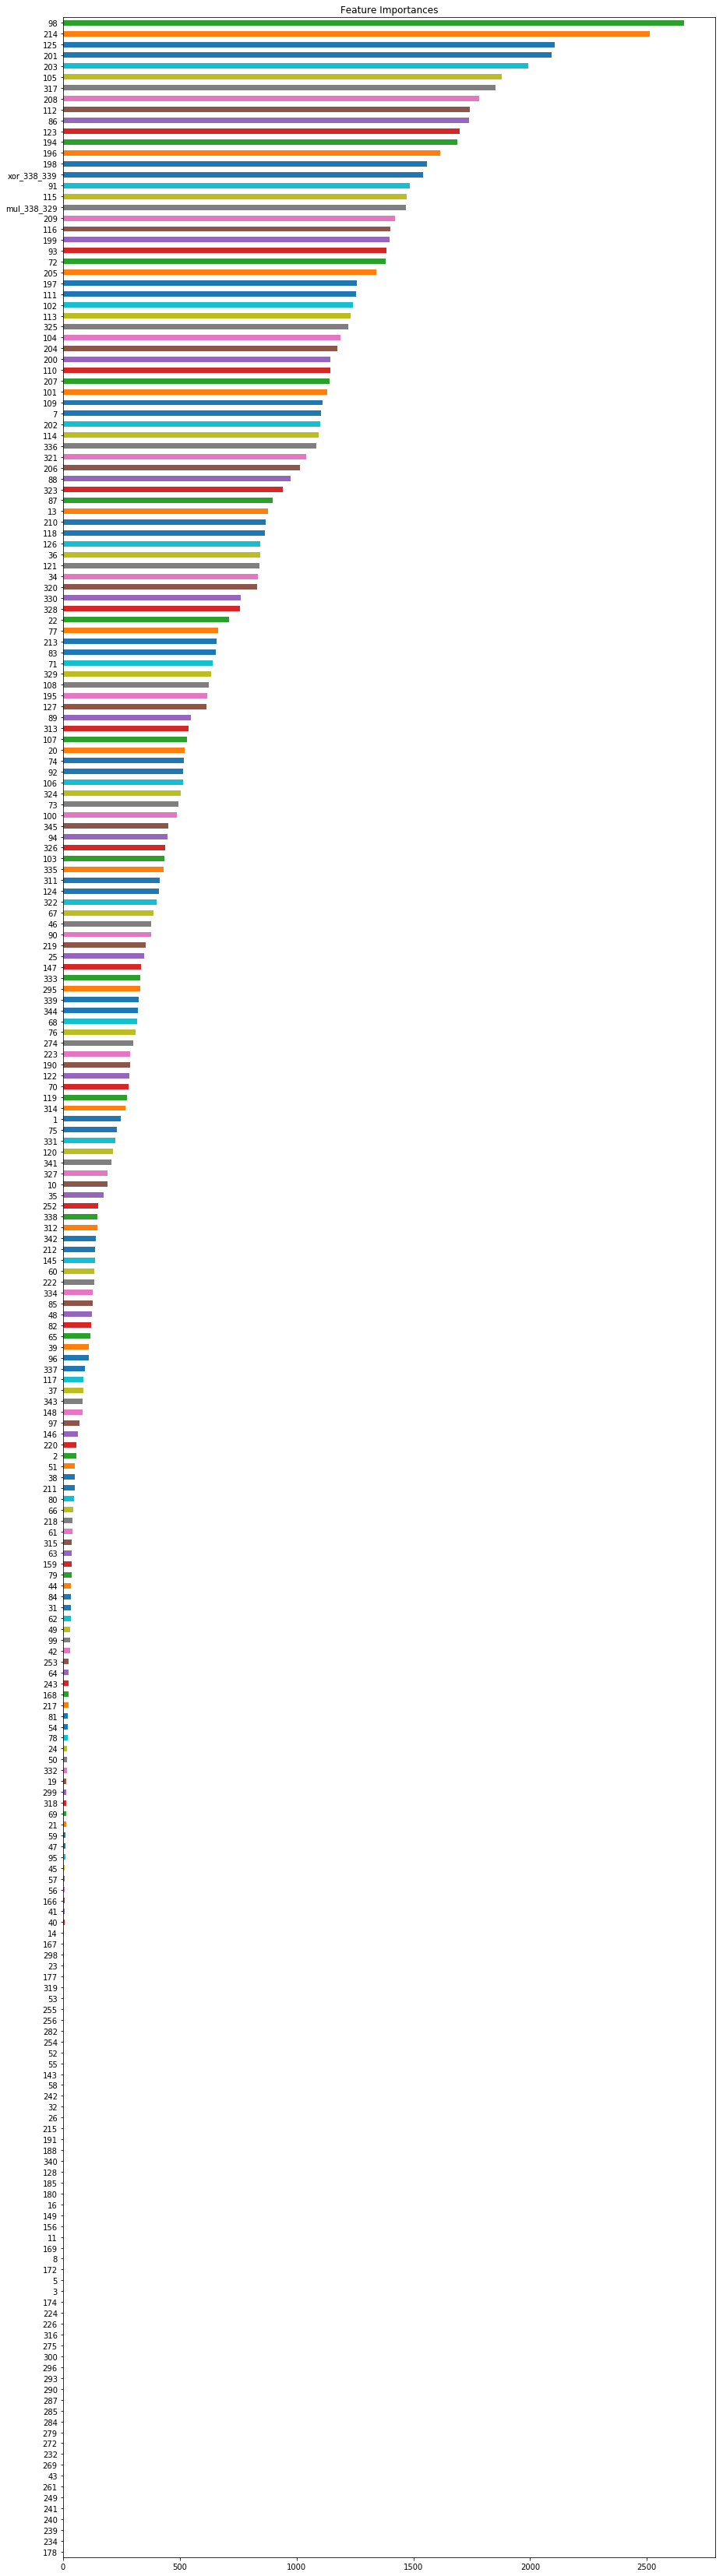

In [79]:
plt.figure(figsize=(15, 60))
feat_imp = pd.Series(np.array(esimator.feature_importances_))
feat_imp.index = np.array(col_names)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importances')

In [32]:
oof_07410 = oof
sub_07410 = sub

In [80]:
oof = oof_07410
sub = sub_07410

In [81]:
oof.to_csv('train_lgbm_07410.csv', index=False)
sub.to_csv('sub_lgbm_07410.csv', index=False)

# CatBoost

In [83]:
!pip install catboost
from catboost import CatBoostClassifier

    100% |################################| 33.1MB 47kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [84]:
transforms = [
    'drop_const',
    'drop_corr_1',
    #'drop_corr_095',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    #'make_boolean_zero_no_zero',
    #'replace_zeros_less_010_with_means',
    #'replace_zeros_less_020_with_means',
    #'replace_zeros_less_040_with_means',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    'to_categorical',
    #'feature_338_339',
    #'feature_338_329',
]

X, y, competition_data, (cat_features, col_names) = get_trainable_data(train, test, 
                                                                       drop_thr=241, 
                                                                       transforms=transforms)

data_generator = get_cv_data(X, y)

In [85]:
def trainer(estimator, 
            x_train, y_train, 
            x_val, y_val,
            x_competition,
            cat_features,
            metric=roc_auc_score):
    estimator.fit(x_train, y_train,
                  eval_set=(x_val, y_val),
                  cat_features=cat_features,
                  verbose=False, plot=True)
    
    y_train_pred = estimator.predict_proba(x_train)[:, 1]
    train_score = roc_auc_score(y_train, y_train_pred)
    
    y_val_pred = estimator.predict_proba(x_val)[:, 1]
    val_score = roc_auc_score(y_val, y_val_pred)
    
    y_competition = estimator.predict_proba(x_competition)[:, 1]
    
    return train_score, val_score, y_val_pred, y_competition

In [86]:
from tqdm import tqdm
def train_one_thread(estimator, 
                     data_generator,
                     competition_data,
                     cat_features,
                     train_ids,
                     test_ids):
    
    oof = pd.DataFrame({'_ID_': train_ids,
                        '_VAL_': np.zeros_like(train_ids)})
    sub = pd.DataFrame({'_ID_': test_ids,
                        '_VAL_': np.zeros_like(test_ids)})
    val_scores = []
    train_scores = []
    
    for (X_train, y_train, X_val, y_val, val_ids) in tqdm(data_generator, desc='Train one thread'):
        train_score, val_score, y_val_pred, y_competition = trainer(estimator, 
                                                                    X_train, y_train, 
                                                                    X_val, y_val, 
                                                                    competition_data,
                                                                    cat_features)
        
        oof['_VAL_'].loc[val_ids] = y_val_pred
        sub['_VAL_'] += y_competition / len(data_generator)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        print('\tTrain Score ', train_score, '\n\tVal Score: ', val_score, '\n')
    print('Train Total: ', np.mean(train_scores), '\n', 'Val Total: ', np.mean(val_scores))
    
    return oof, sub

In [107]:
model=CatBoostClassifier(loss_function='Logloss',
                         iterations=2000, 
                         depth=7, 
                         learning_rate=0.01,
                         l2_leaf_reg=3.,
                         rsm=0.8,
                         random_seed=0xCAFFE,
                         eval_metric='AUC',
                         use_best_model=True)

In [108]:
oof, sub = train_one_thread(estimator=model,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            cat_features=cat_features,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:   0%|          | 0/5 [00:00<?, ?it/s]

CatboostIpythonWidget(data={'.': {'path': '.', 'name': 'current', 'content': {'passed_iterations': 25, 'total_iterations': 2000, 'data': {'iterations': [{'learn': [0.6245255452, 0.6877487198], 'iteration': 0, 'passed_time': 0.04271419959, 'remaining_time': 85.38568498, 'test': [0.6002118566, 0.6878026321]}, {'learn': [0.6251204286, 0.6827435472], 'iteration': 1, 'passed_time': 0.06445317894, 'remaining_time': 64.38872576, 'test': [0.6009796302, 0.6828093024]}, {'learn': [0.6433971592, 0.6775873845], 'iteration': 2, 'passed_time': 0.104804965, 'remaining_time': 69.76517168, 'test': [0.6236560059, 0.677720851]}, {'learn': [0.6523149691, 0.6725122814], 'iteration': 3, 'passed_time': 0.1450296776, 'remaining_time': 72.36980914, 'test': [0.636591295, 0.6726688503]}, {'learn': [0.6577308733, 0.6674178189], 'iteration': 4, 'passed_time': 0.1857898935, 'remaining_time': 74.13016749, 'test': [0.6460752321, 0.6676240263]}, {'learn': [0.6622846652, 0.66260696], 'iteration': 5, 'passed_time': 0.225243605, 'remaining_time': 74.85595806, 'test': [0.646692795, 0.6628493252]}, {'learn': [0.6743791912, 0.6574749652], 'iteration': 6, 'passed_time': 0.2617274084, 'remaining_time': 74.51753215, 'test': [0.6574681756, 0.6577859949]}, {'learn': [0.675811895, 0.6527482047], 'iteration': 7, 'passed_time': 0.2984921256, 'remaining_time': 74.32453927, 'test': [0.6597136169, 0.6530941296]}, {'learn': [0.6758299588, 0.6481632492], 'iteration': 8, 'passed_time': 0.3348180022, 'remaining_time': 74.06918249, 'test': [0.6609823679, 0.6485180646]}, {'learn': [0.677350948, 0.6436290362], 'iteration': 9, 'passed_time': 0.3697953219, 'remaining_time': 73.58926906, 'test': [0.6626780478, 0.6440381273]}, {'learn': [0.6778766153, 0.6392258746], 'iteration': 10, 'passed_time': 0.4050188678, 'remaining_time': 73.23477527, 'test': [0.6618297026, 0.6396959153]}, {'learn': [0.6797463851, 0.6347932062], 'iteration': 11, 'passed_time': 0.4399403379, 'remaining_time': 72.88344931, 'test': [0.6641850227, 0.6353183687]}, {'learn': [0.6822289757, 0.630395806], 'iteration': 12, 'passed_time': 0.4740805263, 'remaining_time': 72.46138505, 'test': [0.6673646176, 0.6309551383]}, {'learn': [0.6830702779, 0.6261591777], 'iteration': 13, 'passed_time': 0.5100377911, 'remaining_time': 72.3525038, 'test': [0.6682475985, 0.6267552594]}, {'learn': [0.6853720461, 0.6219270755], 'iteration': 14, 'passed_time': 0.5468787737, 'remaining_time': 72.37029105, 'test': [0.6697497042, 0.6225674088]}, {'learn': [0.6858074861, 0.6179225324], 'iteration': 15, 'passed_time': 0.5813438351, 'remaining_time': 72.08663555, 'test': [0.6705513784, 0.6185871719]}, {'learn': [0.6872101869, 0.6139486359], 'iteration': 16, 'passed_time': 0.617874759, 'remaining_time': 72.07327335, 'test': [0.6731033044, 0.6146070579]}, {'learn': [0.6888667699, 0.6105582615], 'iteration': 17, 'passed_time': 0.6369124948, 'remaining_time': 70.13114248, 'test': [0.6750671584, 0.6112067486]}, {'learn': [0.6882799014, 0.6069908497], 'iteration': 18, 'passed_time': 0.6742152628, 'remaining_time': 70.2958124, 'test': [0.674285604, 0.607639128]}, {'learn': [0.6893157118, 0.6032345493], 'iteration': 19, 'passed_time': 0.7108099071, 'remaining_time': 70.37018081, 'test': [0.675337078, 0.6038983616]}, {'learn': [0.6914113142, 0.5999554633], 'iteration': 20, 'passed_time': 0.7474245843, 'remaining_time': 70.43586916, 'test': [0.6760893252, 0.6006519104]}, {'learn': [0.6911168286, 0.596490051], 'iteration': 21, 'passed_time': 0.782103511, 'remaining_time': 70.31821567, 'test': [0.675553712, 0.5972327854]}, {'learn': [0.6915655522, 0.59300348], 'iteration': 22, 'passed_time': 0.8177801121, 'remaining_time': 70.29353399, 'test': [0.6761911193, 0.5937583051]}, {'learn': [0.6921966092, 0.5896220589], 'iteration': 23, 'passed_time': 0.8541341366, 'remaining_time': 70.32371058, 'test': [0.6773655179, 0.5903997264]}, {'learn': [0.6935879454, 0.5863334967], 'iteration': 24, 'passed_time': 0.8888008966, 'remaining_time': 70.21527083, 'test': [0.6788

Train one thread:  20%|██        | 1/5 [01:16<05:06, 76.53s/it]

	Train Score  0.8549545256263005 
	Val Score:  0.7388956261621795 



CatboostIpythonWidget(data={'.': {'path': '.', 'name': 'current', 'content': {'passed_iterations': 25, 'total_iterations': 2000, 'data': {'iterations': [{'learn': [0.6409418942, 0.6876030358], 'iteration': 0, 'passed_time': 0.04077593045, 'remaining_time': 81.51108498, 'test': [0.639705477, 0.6876202908]}, {'learn': [0.6404093322, 0.6826119818], 'iteration': 1, 'passed_time': 0.06178889999, 'remaining_time': 61.72711109, 'test': [0.6402837188, 0.6826082242]}, {'learn': [0.6524745676, 0.6773857584], 'iteration': 2, 'passed_time': 0.1002933767, 'remaining_time': 66.76195774, 'test': [0.6517920534, 0.6774120387]}, {'learn': [0.6640388815, 0.672308937], 'iteration': 3, 'passed_time': 0.1386232127, 'remaining_time': 69.17298314, 'test': [0.6620155594, 0.6723536179]}, {'learn': [0.6699041069, 0.667200072], 'iteration': 4, 'passed_time': 0.1772249154, 'remaining_time': 70.71274126, 'test': [0.6650335516, 0.66728765]}, {'learn': [0.6692899933, 0.6624298662], 'iteration': 5, 'passed_time': 0.212738753, 'remaining_time': 70.70017892, 'test': [0.6636068728, 0.6625643423]}, {'learn': [0.6709212903, 0.6574550601], 'iteration': 6, 'passed_time': 0.2490523405, 'remaining_time': 70.90875924, 'test': [0.6663203096, 0.657578705]}, {'learn': [0.6760974406, 0.6526902698], 'iteration': 7, 'passed_time': 0.2858052868, 'remaining_time': 71.16551642, 'test': [0.6700412137, 0.6528528349]}, {'learn': [0.6744734231, 0.6481288204], 'iteration': 8, 'passed_time': 0.3219330803, 'remaining_time': 71.21875144, 'test': [0.6685083309, 0.648302575]}, {'learn': [0.6754702158, 0.6436148209], 'iteration': 9, 'passed_time': 0.3565699392, 'remaining_time': 70.95741791, 'test': [0.6677716101, 0.6438072734]}, {'learn': [0.6770060226, 0.6392961049], 'iteration': 10, 'passed_time': 0.3916107673, 'remaining_time': 70.81034693, 'test': [0.6698797948, 0.6395372706]}, {'learn': [0.6774499947, 0.6350007536], 'iteration': 11, 'passed_time': 0.4266186798, 'remaining_time': 70.67649462, 'test': [0.6698870527, 0.6352642694]}, {'learn': [0.6786785551, 0.6307074755], 'iteration': 12, 'passed_time': 0.4606307459, 'remaining_time': 70.40563785, 'test': [0.6714040416, 0.6310021647]}, {'learn': [0.6807018676, 0.6264012939], 'iteration': 13, 'passed_time': 0.4965826372, 'remaining_time': 70.4437941, 'test': [0.6729698146, 0.6267564896]}, {'learn': [0.6829987809, 0.622180354], 'iteration': 14, 'passed_time': 0.5332775824, 'remaining_time': 70.57040007, 'test': [0.6754761721, 0.6225750796]}, {'learn': [0.6833171333, 0.6182613], 'iteration': 15, 'passed_time': 0.5679745752, 'remaining_time': 70.42884733, 'test': [0.6747484547, 0.618704403]}, {'learn': [0.6858905201, 0.6141975493], 'iteration': 16, 'passed_time': 0.6037559699, 'remaining_time': 70.42635814, 'test': [0.6765026569, 0.6146695441]}, {'learn': [0.6876214096, 0.6102209021], 'iteration': 17, 'passed_time': 0.6422937791, 'remaining_time': 70.72368168, 'test': [0.6783354096, 0.610757687]}, {'learn': [0.6879786936, 0.6067004346], 'iteration': 18, 'passed_time': 0.6810458004, 'remaining_time': 71.00798583, 'test': [0.6783762008, 0.6072283097]}, {'learn': [0.6875726073, 0.6031395309], 'iteration': 19, 'passed_time': 0.7191582836, 'remaining_time': 71.19667008, 'test': [0.6785593015, 0.6036783002]}, {'learn': [0.6875279648, 0.5996385639], 'iteration': 20, 'passed_time': 0.7595500997, 'remaining_time': 71.57855464, 'test': [0.678518786, 0.6002064677]}, {'learn': [0.6865603363, 0.5963548881], 'iteration': 21, 'passed_time': 0.7975707721, 'remaining_time': 71.70886306, 'test': [0.6776161445, 0.5969413361]}, {'learn': [0.6871342601, 0.5928386873], 'iteration': 22, 'passed_time': 0.8378567097, 'remaining_time': 72.01924848, 'test': [0.6785163054, 0.5933997173]}, {'learn': [0.6880574069, 0.5895589676], 'iteration': 23, 'passed_time': 0.8768339955, 'remaining_time': 72.19266563, 'test': [0.6794983243, 0.5901183296]}, {'learn': [0.6884892962, 0.5863489687], 'iteration': 24, 'passed_time': 0.9139495193, 'remaining_time': 72.20201203, 'test': [0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [02:33<03:50, 76.94s/it]

	Train Score  0.8521485150328381 
	Val Score:  0.7385106828655217 



CatboostIpythonWidget(data={'.': {'path': '.', 'name': 'current', 'content': {'passed_iterations': 24, 'total_iterations': 2000, 'data': {'iterations': [{'learn': [0.6303107784, 0.6876733518], 'iteration': 0, 'passed_time': 0.04096294019, 'remaining_time': 81.88491745, 'test': [0.6336657309, 0.6876651439]}, {'learn': [0.6441087665, 0.6823435989], 'iteration': 1, 'passed_time': 0.08139720204, 'remaining_time': 81.31580484, 'test': [0.6476391103, 0.6823152745]}, {'learn': [0.6648930501, 0.6768626351], 'iteration': 2, 'passed_time': 0.1220031262, 'remaining_time': 81.21341435, 'test': [0.6625994827, 0.6768376172]}, {'learn': [0.6706682142, 0.6717810632], 'iteration': 3, 'passed_time': 0.1619463166, 'remaining_time': 80.81121198, 'test': [0.668918498, 0.6717491025]}, {'learn': [0.6718898765, 0.6667986201], 'iteration': 4, 'passed_time': 0.2038201317, 'remaining_time': 81.32423256, 'test': [0.6697452343, 0.6667708111]}, {'learn': [0.6788656525, 0.6618890491], 'iteration': 5, 'passed_time': 0.2432070841, 'remaining_time': 80.82582096, 'test': [0.6778380067, 0.6618529297]}, {'learn': [0.6824774734, 0.6569414445], 'iteration': 6, 'passed_time': 0.2832899715, 'remaining_time': 80.65670187, 'test': [0.6823792218, 0.6569114193]}, {'learn': [0.6834962435, 0.6523611145], 'iteration': 7, 'passed_time': 0.3237982986, 'remaining_time': 80.62577635, 'test': [0.6846866773, 0.6523402324]}, {'learn': [0.6830725971, 0.6478367116], 'iteration': 8, 'passed_time': 0.3629478108, 'remaining_time': 80.29212126, 'test': [0.6852325052, 0.6478033839]}, {'learn': [0.6843082031, 0.6432964931], 'iteration': 9, 'passed_time': 0.4030591822, 'remaining_time': 80.20877725, 'test': [0.6866865762, 0.6432630969]}, {'learn': [0.6835661283, 0.6390968987], 'iteration': 10, 'passed_time': 0.440343773, 'remaining_time': 79.62216042, 'test': [0.6867074353, 0.6390386593]}, {'learn': [0.6824649143, 0.6348840293], 'iteration': 11, 'passed_time': 0.476358457, 'remaining_time': 78.9167177, 'test': [0.6860270801, 0.6348152616]}, {'learn': [0.6831193689, 0.6304496178], 'iteration': 12, 'passed_time': 0.5119299477, 'remaining_time': 78.24652354, 'test': [0.6858154569, 0.6303758973]}, {'learn': [0.6826186275, 0.6264441966], 'iteration': 13, 'passed_time': 0.5475014274, 'remaining_time': 77.6669882, 'test': [0.6859871078, 0.6263360817]}, {'learn': [0.6841530823, 0.6222465257], 'iteration': 14, 'passed_time': 0.582270314, 'remaining_time': 77.05377155, 'test': [0.6872055722, 0.6221818471]}, {'learn': [0.6845917065, 0.618172509], 'iteration': 15, 'passed_time': 0.6166382952, 'remaining_time': 76.4631486, 'test': [0.6882976876, 0.6180810229]}, {'learn': [0.6848253816, 0.6143481682], 'iteration': 16, 'passed_time': 0.6552187631, 'remaining_time': 76.42934161, 'test': [0.6885323752, 0.6142339104]}, {'learn': [0.6847108335, 0.6106804447], 'iteration': 17, 'passed_time': 0.6921414892, 'remaining_time': 76.21246842, 'test': [0.6894402507, 0.6105292561]}, {'learn': [0.6838348377, 0.607215179], 'iteration': 18, 'passed_time': 0.7272816562, 'remaining_time': 75.82868216, 'test': [0.6891493262, 0.6070371098]}, {'learn': [0.6839716083, 0.6038979755], 'iteration': 19, 'passed_time': 0.7639028079, 'remaining_time': 75.62637798, 'test': [0.689271724, 0.6037123525]}, {'learn': [0.6836434474, 0.6004354835], 'iteration': 20, 'passed_time': 0.8001638348, 'remaining_time': 75.40591567, 'test': [0.6886654323, 0.6002341091]}, {'learn': [0.6840272564, 0.5969499522], 'iteration': 21, 'passed_time': 0.8369823245, 'remaining_time': 75.2523199, 'test': [0.6894817851, 0.5967112869]}, {'learn': [0.6839621459, 0.593593804], 'iteration': 22, 'passed_time': 0.8714987348, 'remaining_time': 74.91099995, 'test': [0.6900886281, 0.5933140111]}, {'learn': [0.6843031416, 0.5903322288], 'iteration': 23, 'passed_time': 0.9068652742, 'remaining_time': 74.66524091, 'test': [0.6901531351, 0.590048184]}, {'learn': [0.6859626008, 0.5870651747], 'iteration': 24, 'passed_time': 0.9434086278, 'remaining_time': 74.5292816, 'test': 

Train one thread:  60%|██████    | 3/5 [03:50<02:33, 76.89s/it]

	Train Score  0.8547110228462352 
	Val Score:  0.7461979039839007 



CatboostIpythonWidget(data={'.': {'path': '.', 'name': 'current', 'content': {'passed_iterations': 25, 'total_iterations': 2000, 'data': {'iterations': [{'learn': [0.6387664994, 0.6876235167], 'iteration': 0, 'passed_time': 0.03892800185, 'remaining_time': 77.8170757, 'test': [0.6194863748, 0.6876791074]}, {'learn': [0.6577952723, 0.6822471584], 'iteration': 1, 'passed_time': 0.07872932036, 'remaining_time': 78.65059104, 'test': [0.6369047838, 0.6823354786]}, {'learn': [0.67310309, 0.6767639211], 'iteration': 2, 'passed_time': 0.1196948293, 'remaining_time': 79.67685801, 'test': [0.653961915, 0.6768987553]}, {'learn': [0.6759642194, 0.6716005698], 'iteration': 3, 'passed_time': 0.1587909752, 'remaining_time': 79.23669661, 'test': [0.6547193291, 0.6718321429]}, {'learn': [0.6771569726, 0.6665844664], 'iteration': 4, 'passed_time': 0.199473393, 'remaining_time': 79.5898838, 'test': [0.6547352408, 0.6668630101]}, {'learn': [0.6801562598, 0.6614446458], 'iteration': 5, 'passed_time': 0.2400527119, 'remaining_time': 79.77751793, 'test': [0.6575424097, 0.6618218993]}, {'learn': [0.6841385333, 0.6565954256], 'iteration': 6, 'passed_time': 0.2798406421, 'remaining_time': 79.67462854, 'test': [0.6619247424, 0.6569932041]}, {'learn': [0.6847217507, 0.6518892931], 'iteration': 7, 'passed_time': 0.3162001423, 'remaining_time': 78.73383542, 'test': [0.6610843668, 0.6523523957]}, {'learn': [0.6844056012, 0.6473479712], 'iteration': 8, 'passed_time': 0.3504882984, 'remaining_time': 77.53580024, 'test': [0.6608159838, 0.6478389251]}, {'learn': [0.6859390246, 0.6426413996], 'iteration': 9, 'passed_time': 0.3868460118, 'remaining_time': 76.98235635, 'test': [0.6626753503, 0.6431652616]}, {'learn': [0.6855408524, 0.6384326922], 'iteration': 10, 'passed_time': 0.4217735945, 'remaining_time': 76.26433449, 'test': [0.6631425833, 0.6389711377]}, {'learn': [0.6848335383, 0.6341851365], 'iteration': 11, 'passed_time': 0.4576483694, 'remaining_time': 75.81707986, 'test': [0.6602569597, 0.6348237982]}, {'learn': [0.6867683504, 0.6297450996], 'iteration': 12, 'passed_time': 0.4930337637, 'remaining_time': 75.3583145, 'test': [0.6629950554, 0.630426046]}, {'learn': [0.6863987483, 0.6256395674], 'iteration': 13, 'passed_time': 0.5288730533, 'remaining_time': 75.02442028, 'test': [0.6615639245, 0.6264131822]}, {'learn': [0.6873758702, 0.6214971219], 'iteration': 14, 'passed_time': 0.562929186, 'remaining_time': 74.49429561, 'test': [0.6635709109, 0.6222804983]}, {'learn': [0.6870976706, 0.6174771508], 'iteration': 15, 'passed_time': 0.5970784051, 'remaining_time': 74.03772224, 'test': [0.663688271, 0.6183127826]}, {'learn': [0.6886939609, 0.6135229848], 'iteration': 16, 'passed_time': 0.6328702374, 'remaining_time': 73.82245181, 'test': [0.6655372444, 0.614434647]}, {'learn': [0.6883280464, 0.609782559], 'iteration': 17, 'passed_time': 0.6689706489, 'remaining_time': 73.66110145, 'test': [0.6655471777, 0.6107423892]}, {'learn': [0.6874404488, 0.6062017849], 'iteration': 18, 'passed_time': 0.7038018533, 'remaining_time': 73.38060376, 'test': [0.6647455236, 0.6072174763]}, {'learn': [0.6875310529, 0.6026723016], 'iteration': 19, 'passed_time': 0.7440909515, 'remaining_time': 73.6650042, 'test': [0.6651281396, 0.6037380621]}, {'learn': [0.6877180165, 0.5991923187], 'iteration': 20, 'passed_time': 0.7816623193, 'remaining_time': 73.66236809, 'test': [0.6654341404, 0.600293316]}, {'learn': [0.6886901412, 0.5955269615], 'iteration': 21, 'passed_time': 0.8183919321, 'remaining_time': 73.58087462, 'test': [0.6663916001, 0.5967004172]}, {'learn': [0.6887767878, 0.5923152829], 'iteration': 22, 'passed_time': 0.852681716, 'remaining_time': 73.29355446, 'test': [0.666612616, 0.5935185264]}, {'learn': [0.6893850658, 0.5890364917], 'iteration': 23, 'passed_time': 0.8881251276, 'remaining_time': 73.12230217, 'test': [0.6667148002, 0.5903026628]}, {'learn': [0.6896856091, 0.5857901339], 'iteration': 24, 'passed_time': 0.92392593, 'remaining_time': 72.99014847, 'test': [0.6

Train one thread:  80%|████████  | 4/5 [05:07<01:16, 76.93s/it]

	Train Score  0.8565117529528019 
	Val Score:  0.7352240326989511 



CatboostIpythonWidget(data={'.': {'path': '.', 'name': 'current', 'content': {'passed_iterations': 25, 'total_iterations': 2000, 'data': {'iterations': [{'learn': [0.646013175, 0.6875279436], 'iteration': 0, 'passed_time': 0.03857575638, 'remaining_time': 77.112937, 'test': [0.6378445843, 0.6875090344]}, {'learn': [0.6628442896, 0.6820428603], 'iteration': 1, 'passed_time': 0.07558254909, 'remaining_time': 75.50696654, 'test': [0.6570727853, 0.6819755123]}, {'learn': [0.6718724386, 0.676561634], 'iteration': 2, 'passed_time': 0.1113620057, 'remaining_time': 74.12997514, 'test': [0.664192018, 0.6765114393]}, {'learn': [0.6777629014, 0.671485817], 'iteration': 3, 'passed_time': 0.1462028333, 'remaining_time': 72.95521383, 'test': [0.6664549709, 0.6714466323]}, {'learn': [0.6764292218, 0.6664290658], 'iteration': 4, 'passed_time': 0.1832867241, 'remaining_time': 73.13140292, 'test': [0.6655216086, 0.6663690745]}, {'learn': [0.6787234751, 0.6613590881], 'iteration': 5, 'passed_time': 0.2194977513, 'remaining_time': 72.94641935, 'test': [0.6684860548, 0.6613193807]}, {'learn': [0.6834710014, 0.6564986534], 'iteration': 6, 'passed_time': 0.2613518377, 'remaining_time': 74.4106018, 'test': [0.6719045815, 0.6564908415]}, {'learn': [0.685242957, 0.6517777326], 'iteration': 7, 'passed_time': 0.3031933134, 'remaining_time': 75.49513503, 'test': [0.6738332052, 0.65177663]}, {'learn': [0.6837494824, 0.6471611628], 'iteration': 8, 'passed_time': 0.3410486714, 'remaining_time': 75.44754498, 'test': [0.6730991527, 0.6471320909]}, {'learn': [0.6857760302, 0.6424854827], 'iteration': 9, 'passed_time': 0.381769985, 'remaining_time': 75.97222702, 'test': [0.6756388583, 0.6424420829]}, {'learn': [0.6855468548, 0.6382553291], 'iteration': 10, 'passed_time': 0.4202961712, 'remaining_time': 75.9971895, 'test': [0.6749762705, 0.6382443688]}, {'learn': [0.6855078423, 0.6341032117], 'iteration': 11, 'passed_time': 0.4561283405, 'remaining_time': 75.56526173, 'test': [0.6750929867, 0.6340964089]}, {'learn': [0.6870328508, 0.6296059669], 'iteration': 12, 'passed_time': 0.4919519326, 'remaining_time': 75.19296078, 'test': [0.6759350178, 0.6296472461]}, {'learn': [0.6871229438, 0.6257578558], 'iteration': 13, 'passed_time': 0.5276185796, 'remaining_time': 74.84646422, 'test': [0.6761583331, 0.6257987109]}, {'learn': [0.6879513563, 0.6216393462], 'iteration': 14, 'passed_time': 0.5624062633, 'remaining_time': 74.42509551, 'test': [0.6766640117, 0.6216749596]}, {'learn': [0.6886315076, 0.617541598], 'iteration': 15, 'passed_time': 0.5968054534, 'remaining_time': 74.00387622, 'test': [0.6772316813, 0.6175919333]}, {'learn': [0.6892549494, 0.6137944309], 'iteration': 16, 'passed_time': 0.6324415024, 'remaining_time': 73.77244114, 'test': [0.6787168936, 0.6138374409]}, {'learn': [0.6901292787, 0.6098968883], 'iteration': 17, 'passed_time': 0.6682714081, 'remaining_time': 73.58410727, 'test': [0.6794315393, 0.6099872074]}, {'learn': [0.6892786889, 0.6064145578], 'iteration': 18, 'passed_time': 0.7033921133, 'remaining_time': 73.33788297, 'test': [0.6788448308, 0.6065085265]}, {'learn': [0.6897870519, 0.6028746595], 'iteration': 19, 'passed_time': 0.7399482277, 'remaining_time': 73.25487454, 'test': [0.6787987513, 0.6029909891]}, {'learn': [0.6895364575, 0.599390151], 'iteration': 20, 'passed_time': 0.7762020013, 'remaining_time': 73.14779812, 'test': [0.677799259, 0.5995308629]}, {'learn': [0.6893355247, 0.5959597013], 'iteration': 21, 'passed_time': 0.8121278873, 'remaining_time': 73.01768005, 'test': [0.6777282544, 0.5961135557]}, {'learn': [0.6893911026, 0.5925750329], 'iteration': 22, 'passed_time': 0.8466224498, 'remaining_time': 72.77272101, 'test': [0.6772326931, 0.5927768227]}, {'learn': [0.6897265917, 0.5892957744], 'iteration': 23, 'passed_time': 0.8819821109, 'remaining_time': 72.61652713, 'test': [0.6768019742, 0.5895300587]}, {'learn': [0.6898599936, 0.586164245], 'iteration': 24, 'passed_time': 0.9179702185, 'remaining_time': 72.51964726, 'test': [0

Train one thread: 100%|██████████| 5/5 [06:24<00:00, 77.00s/it]

	Train Score  0.8557113418556888 
	Val Score:  0.7414814596800006 

Train Total:  0.854807431662773 
 Val Total:  0.7400619410781107


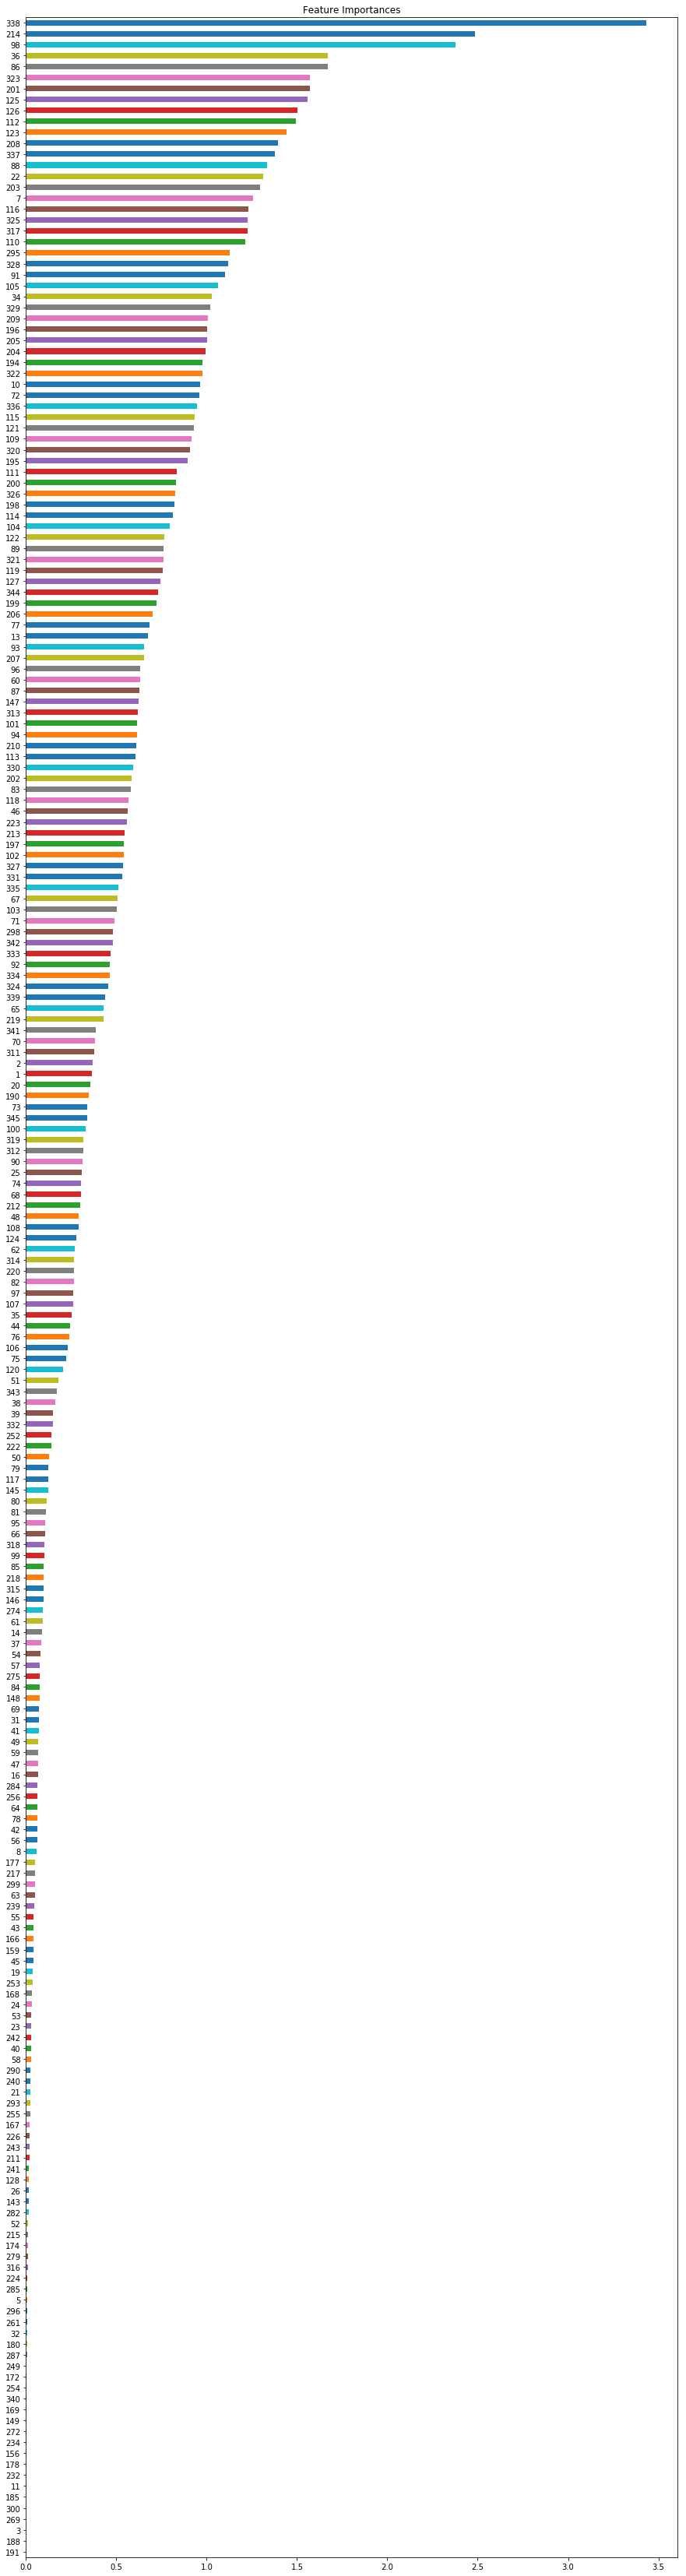

In [109]:
plt.figure(figsize=(15, 60))
feat_imp = pd.Series(np.array(model.feature_importances_))
feat_imp.index = np.array(col_names)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importances')

In [110]:
oof_07400 = oof
sub_07400 = sub

In [111]:
oof = oof_07400
sub = sub_07400

In [112]:
oof.to_csv('train_catboost_07400.csv', index=False)
sub.to_csv('sub_catboost_07400.csv', index=False)

# Weighted average

In [102]:
from sklearn.base import BaseEstimator, ClassifierMixin

class LinerWeightClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, weights=None):
        self.weights = weights
        
    def fit(self, X, y):
        pass
    
    def predict_proba(self, X):
        zeros_prob = (1 - X)
        return np.hstack([np.sum(zeros_prob * self.weights, axis=1).reshape((-1, 1)), 
                          np.sum(X * self.weights, axis=1).reshape((-1, 1))])

In [103]:
logreg = 'train_logreg_07235.csv'
forest = 'train_randomforest_07318.csv'
extra = 'train_extratrees_07366.csv'
catboost = 'train_catboost_07400.csv'
xgboost = 'train_xgboost_07410.csv'
lightgbm = 'train_lgbm_07410.csv'
knn = 'train_knn_06516.csv'

all_pred = [logreg, forest, extra, xgboost, catboost, lightgbm, knn]
X_pred = np.hstack([np.array(pd.read_csv(pred)['_VAL_'].reshape((-1, 1))) for pred in all_pred])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [104]:
logreg = 'sub_logreg_07235.csv'
forest = 'sub_randomforest_07318.csv'
extra = 'sub_extratrees_07366.csv'
catboost = 'sub_catboost_07400.csv'
xgboost = 'sub_xgboost_07410.csv'
lightgbm = 'sub_lgbm_07410.csv'
knn = 'sub_knn_06516.csv'

all_pred = [logreg, forest, extra, xgboost, catboost, lightgbm, knn]
X_pred_competition = np.hstack([np.array(pd.read_csv(pred)['_VAL_'].reshape((-1, 1))) for pred in all_pred])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [112]:
weights = [0.04, 0.1, 0.1, 0.25, 0.25, 0.25, 0.01]
estimator = LinerWeightClassifier(weights=weights)
np.sum(weights)

1.0

In [113]:
_DEFULT_CV_ALGO = StratifiedKFold(n_splits=5, 
                                  random_state=0x42)
def get_cv_data(X, y, cv_algo=_DEFULT_CV_ALGO):
    cv_data = []
    for train_ids, val_ids in cv_algo.split(X, y):
        X_train, X_val = X[train_ids], X[val_ids]
        y_train, y_val = y[train_ids], y[val_ids]
        cv_data.append((X_train, y_train, X_val, y_val, val_ids))
        
    return cv_data

data_generator = get_cv_data(X, y, cv_algo=StratifiedKFold(5, True, 0x42))

In [114]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=X_pred_competition,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:   0%|          | 0/5 [00:00<?, ?it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:00<00:00, 16.07it/s]

	Train Score  0.7446399477444416 
	Val Score:  0.7365407654032441 

	Train Score  0.741801417617254 
	Val Score:  0.7477337037608685 



Train one thread:  80%|████████  | 4/5 [00:00<00:00, 11.40it/s]

	Train Score  0.7417660623206832 
	Val Score:  0.7478557874762809 

	Train Score  0.744216896277911 
	Val Score:  0.7380325812231203 



Train one thread: 100%|██████████| 5/5 [00:00<00:00, 10.79it/s]

	Train Score  0.7424954638776052 
	Val Score:  0.7450605747333645 

Train Total:  0.742983957567579 
 Val Total:  0.7430446825193757


In [115]:
oof.to_csv('train_blend_07429.csv', index=False)
sub.to_csv('sub_blend_07429.csv', index=False)

# Stacking

In [275]:
logreg = 'train_logreg_07235.csv'
forest = 'train_randomforest_07318.csv'
extra = 'train_extratrees_07366.csv'
catboost = 'train_catboost_07400.csv'
xgboost = 'train_xgboost_07410.csv'
lightgbm = 'train_lgbm_07410.csv'
knn = 'train_knn_06516.csv'

all_pred = [logreg, forest, extra, xgboost, catboost, lightgbm, knn]
X_pred = np.hstack([np.array(pd.read_csv(pred)['_VAL_'].reshape((-1, 1))) for pred in all_pred])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [276]:
logreg = 'sub_logreg_07235.csv'
forest = 'sub_randomforest_07318.csv'
extra = 'sub_extratrees_07366.csv'
catboost = 'sub_catboost_07400.csv'
xgboost = 'sub_xgboost_07410.csv'
lightgbm = 'sub_lgbm_07410.csv'
knn = 'sub_knn_06516.csv'

all_pred = [logreg, forest, extra, xgboost, catboost, lightgbm, knn]
X_pred_competition = np.hstack([np.array(pd.read_csv(pred)['_VAL_'].reshape((-1, 1))) for pred in all_pred])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [277]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    #'to_categorical',
    #'feature_338_339',
    #'feature_338_329',
]
X, y, competition_data, col_names = get_trainable_data(train, test, 
                                                       drop_thr=241, 
                                                       transforms=transforms)

col_names = list(col_names[1]) + ['logreg', 'rf', 'ET', 
                               'xgboost', 'catboost',
                               'lightgbm', 'knn']
X = np.hstack([X, X_pred])
competition_data = np.hstack([competition_data, X_pred_competition])
data_generator = get_cv_data(X, y, cv_algo=StratifiedKFold(5, True, 0x42))

In [289]:
import lightgbm as lgb
estimator = lgb.LGBMClassifier(objective='binary',
                               metric="auc",
                               boosting_type="dart",
                               learning_rate=0.03,
                               n_estimators=300,
                               num_leaves=31,
                               feature_fraction=0.6,
                               bagging_fraction=0.9,
                               min_data_in_leaf=13,
                               reg_lambda=3.,
                               data_random_seed=0x42)

In [290]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:01<00:07,  1.86s/it]

	Train Score  0.7889709553220906 
	Val Score:  0.7456482114376851 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:03<00:05,  1.96s/it]

	Train Score  0.7927185270724199 
	Val Score:  0.7426500635753608 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [00:06<00:04,  2.01s/it]

	Train Score  0.7911260420037671 
	Val Score:  0.7477215358532696 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [00:08<00:02,  2.04s/it]

	Train Score  0.7939943274259567 
	Val Score:  0.7365147178391026 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]

	Train Score  0.7927354792216036 
	Val Score:  0.7401828646900628 

Train Total:  0.7919090662091677 
 Val Total:  0.7425434786790962


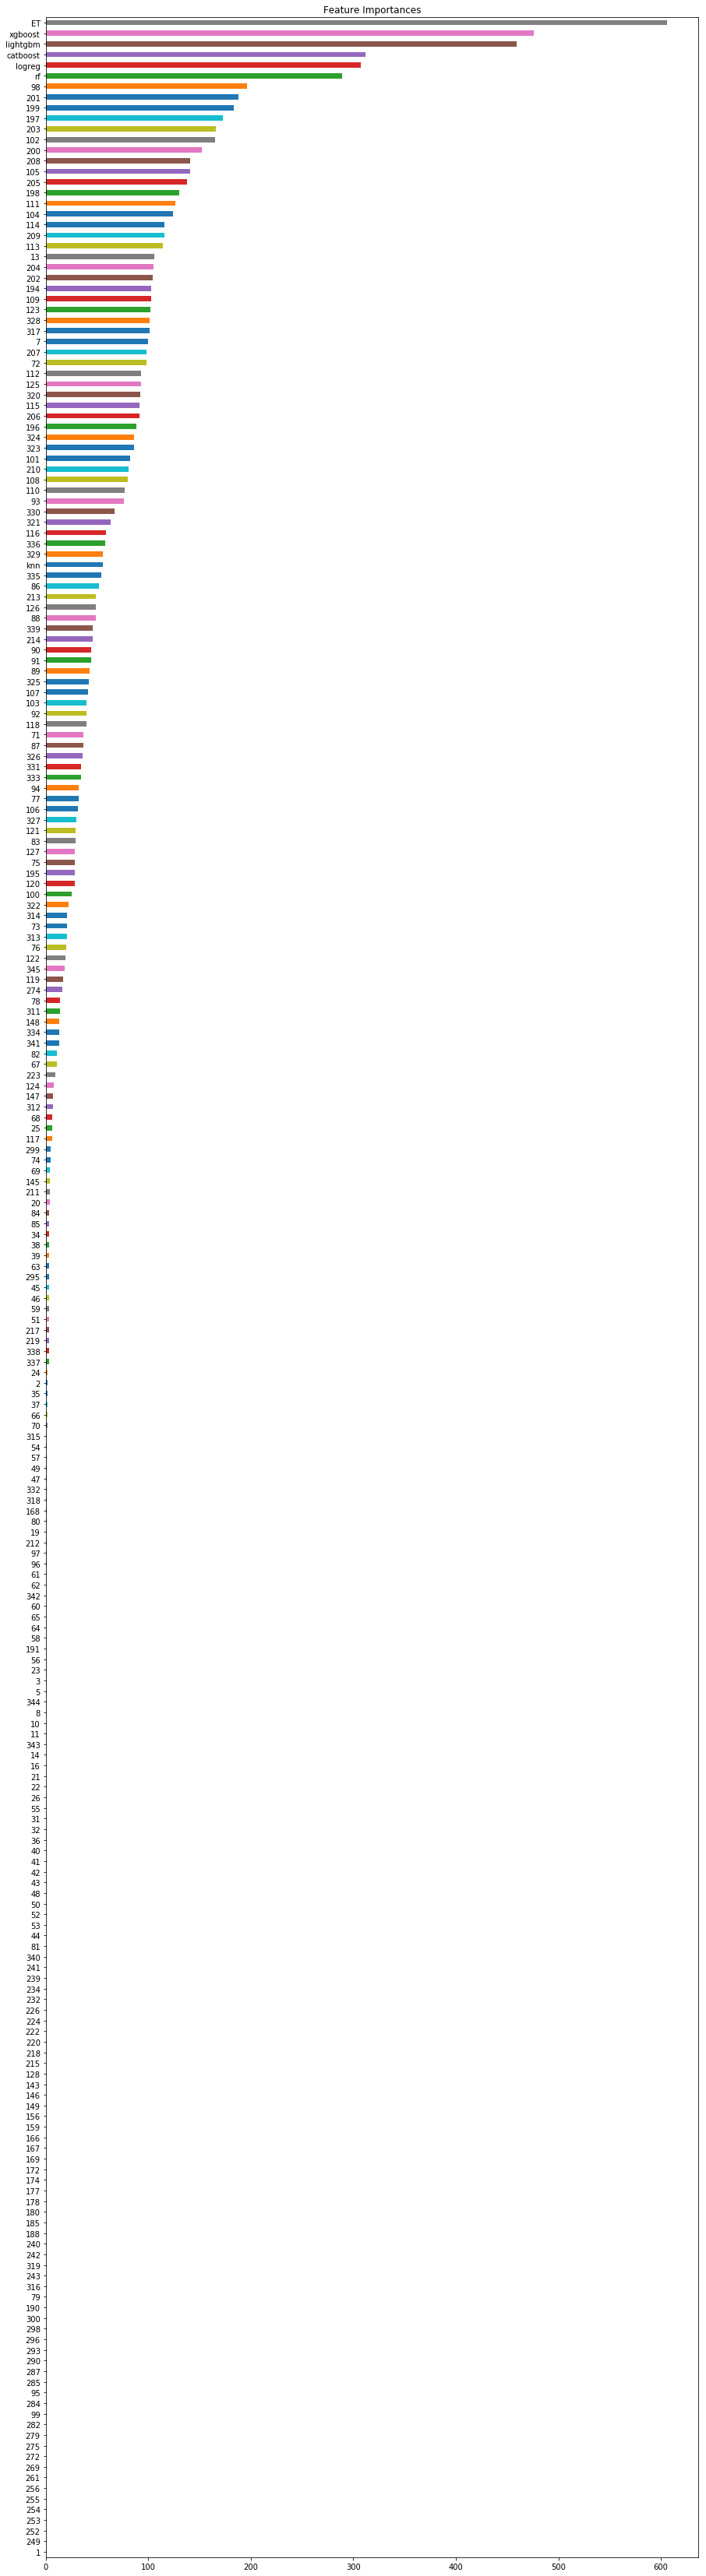

In [215]:
plt.figure(figsize=(15, 60))
feat_imp = pd.Series(np.array(estimator.feature_importances_))
feat_imp.index = np.array(col_names)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importances')

In [252]:
oof.to_csv('train_stacking_07431.csv', index=False)
sub.to_csv('sub_stacking_07431.csv', index=False)

In [253]:
from sklearn.ensemble import ExtraTreesClassifier

In [271]:
estimator = ExtraTreesClassifier(n_estimators=1000,
                                 max_depth=23,
                                 min_samples_leaf=4,
                                 min_samples_split=2,
                                 criterion='entropy',
                                 random_state=0x42,
                                 n_jobs=-1)

In [272]:
transforms = [
    'drop_const',
    'drop_corr_1',
    'make_boolean_one_no_one',
    'make_bolean_more_that_09',
    'clip_by_01',
    'clip_by_04',
    'clip_by_05',
    'clip_by_06',
    #'to_categorical',
    #'feature_338_339',
    #'feature_338_329',
]
X, y, competition_data, col_names = get_trainable_data(train, test, 
                                                       drop_thr=241, 
                                                       transforms=transforms)

col_names = list(col_names[1]) + ['logreg', 'rf', 'ET', 
                               'xgboost', 'catboost',
                               'lightgbm', 'knn']
X = np.hstack([X, X_pred])
competition_data = np.hstack([competition_data, X_pred_competition])
data_generator = get_cv_data(X, y, cv_algo=StratifiedKFold(5, True, 0x42))

In [273]:
oof, sub = train_one_thread(estimator=estimator,
                            data_generator=data_generator,
                            competition_data=competition_data,
                            train_ids=train['Unnamed: 0'],
                            test_ids=test['Unnamed: 0'])

Train one thread:  20%|██        | 1/5 [00:07<00:28,  7.01s/it]

	Train Score  0.9759421064048797 
	Val Score:  0.7516454258814191 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  40%|████      | 2/5 [00:14<00:21,  7.18s/it]

	Train Score  0.9762992467257943 
	Val Score:  0.7434210526315789 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  60%|██████    | 3/5 [00:21<00:14,  7.17s/it]

	Train Score  0.9772669225171448 
	Val Score:  0.7487337067139594 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread:  80%|████████  | 4/5 [00:28<00:07,  7.19s/it]

	Train Score  0.9763918416632799 
	Val Score:  0.735648037437503 



/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Train one thread: 100%|██████████| 5/5 [00:35<00:00,  7.19s/it]

	Train Score  0.9762038900886854 
	Val Score:  0.7433198559303639 

Train Total:  0.9764208014799568 
 Val Total:  0.744553615718965


In [274]:
oof.to_csv('train_stacking_et_07445.csv', index=False)
sub.to_csv('sub_stacking_et_07445.csv', index=False)